# find background

In [1]:
import numpy as np
import cv2
from skimage import data, filters

# Open Video
cap = cv2.VideoCapture('q2_input.mp4')

# Randomly select 25 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)

# Store selected frames in an array
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    

background = cv2.cvtColor(medianFrame, cv2.COLOR_RGB2BGR)


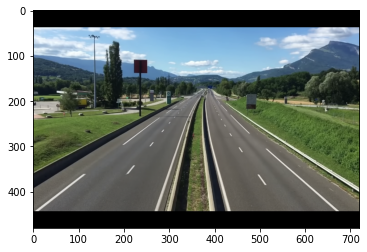

In [2]:
import matplotlib.pyplot as plt

plt.imshow(background)

# hough transform and find lanes

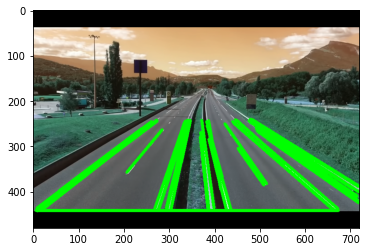

In [3]:
medianFrame = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
BG_img = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
# Convert the image to gray-scale


gray = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
ret,gray[:240] = cv2.threshold(gray[:240],0,1,cv2.THRESH_BINARY)
gray = cv2.GaussianBlur(gray,(11,11) , 0)
ret,gray = cv2.threshold(gray,120,210,cv2.THRESH_BINARY)


# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 100 , 150)
# Detect points that form a line
threshold = 33 # Min number of votes for valid line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=30, maxLineGap=800)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(medianFrame, (x1, y1), (x2, y2), (0, 255, 0), 6)
# Show result
plt.imshow( medianFrame)

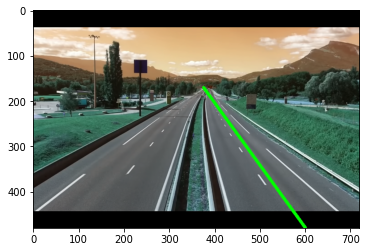

In [4]:
medianFrame = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
x1 = 375
y1 = 170
x2 = 600
y2 = medianFrame.shape[0]
cv2.line(medianFrame, (x1, y1), (x2, y2), (0, 255, 0), 6)
plt.imshow( medianFrame)

# generate mask for detect right lane

In [5]:
mask = np.ones((BG_img.shape))

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if (medianFrame[i,j , 0] == 0 and medianFrame[i,j , 1] == 255 and  medianFrame[i,j , 2] == 0 ):
            break
        else:
            mask[i,j] = np.array([0 , 0 , 0])


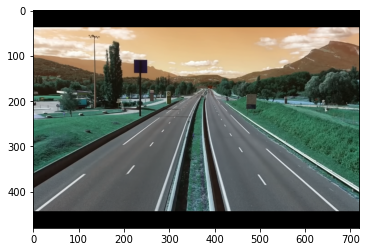

In [6]:
plt.imshow( BG_img , cmap="gray")

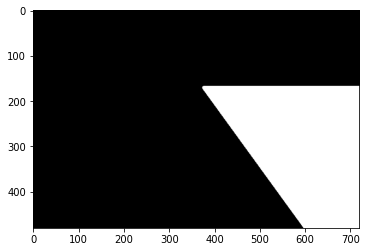

In [8]:
plt.imshow( mask )

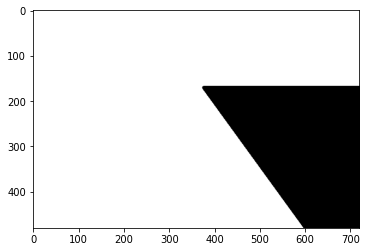

In [9]:
plt.imshow(( 1 - mask)  )

# execute mask on video

In [10]:

# Opens the Video file
framesOfnewVideo = []
cap= cv2.VideoCapture('q2_input.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    
    new_frame = ((1 - mask )* BG_img) + (mask * frame)

    framesOfnewVideo.append(new_frame)
    

    i+=1
cap.release()
cv2.destroyAllWindows()

In [11]:
framesOfnewVideo = np.array(framesOfnewVideo , dtype='uint8')

In [12]:
framesOfnewVideo[543][250,356]

array([42, 84, 65], dtype=uint8)

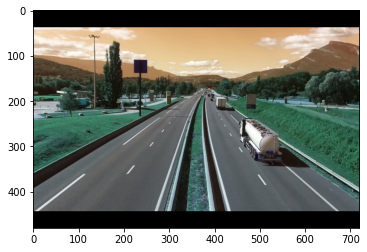

In [13]:
plt.imshow( framesOfnewVideo[380])

# generate output1

In [14]:
size = (720 , 480)
time = 26
fps = int(framesOfnewVideo.shape[0] / time)


out = cv2.VideoWriter('q2_output1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for f in framesOfnewVideo:
    out.write(f)
out.release()


# load yolo-v5

In [7]:
import torch
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

img = cv2.imread('test.png')

results = model(img) 
results.pandas().xyxy[0].to_numpy()

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\Farhad/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-7-10 Python-3.9.12 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


array([[124.03739166259766, 265.8379211425781, 189.2929229736328, 325.399169921875, 0.9098981022834778, 2, 'car'],
       [229.53248596191406, 243.4255828857422, 287.68341064453125, 310.6562805175781, 0.6983398199081421, 2, 'car'],
       [466.38232421875, 140.44375610351562, 491.2536926269531, 175.2088623046875, 0.6265069842338562, 7, 'truck'],
       [404.3314514160156, 220.45858764648438, 443.8843078613281, 247.70916748046875, 0.5909340381622314, 2, 'car'],
       [473.8650207519531, 195.989013671875, 664.4375610351562, 383.49200439453125, 0.5704222321510315, 7, 'truck'],
       [277.6365966796875, 193.4431610107422, 314.7814025878906, 235.92245483398438, 0.44700145721435547, 7, 'truck'],
       [384.2843933105469, 154.6120147705078, 400.7622375488281, 177.28707885742188, 0.37583810091018677, 2, 'car'],
       [277.8876953125, 193.10476684570312, 314.7439880371094, 236.0782012939453, 0.36514005064964294, 2, 'car'],
       [302.9377746582031, 165.3963623046875, 317.27264404296875, 18

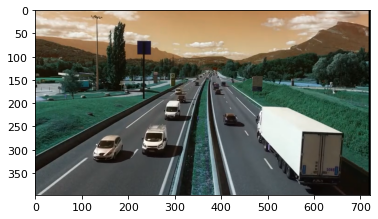

In [8]:
from scipy import signal
img = cv2.imread('test.png')
# img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# _ , img1 =  cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)

# kernel = np.ones((81,81),np.float32)/81**2
# dst = cv2.filter2D(img,-1,kernel)
# xc =  np.ones((3,3),np.float32)
# img[:,:,0] = signal.convolve2d(img[:,:,0], kernel, mode="same")
# img[:,:,1] = signal.convolve2d(img[:,:,1], kernel, mode="same")
# img[:,:,2] = signal.convolve2d(img[:,:,2], kernel, mode="same")
plt.imshow(img  )

# dst.shape

In [9]:
img = cv2.imread('test.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ , img1 =  cv2.threshold(img1, 80, 255, cv2.THRESH_BINARY)
# plt.imshow(img1 ,cmap='gray' )

position = results.pandas().xyxy[0].to_numpy()[3]
pos = position[ :4]
print(img1[int(pos[1]):int(pos[3])  , int(pos[0]):int(pos[2])].mean() )
np.median(img1[int(pos[1]):int(pos[3])  , int(pos[0]):int(pos[2])])

97.35042735042735


0.0

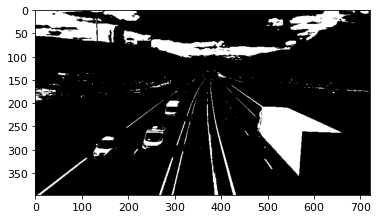

In [10]:
img = cv2.imread('test.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ , img1 =  cv2.threshold(img1, 170, 255, cv2.THRESH_BINARY)
plt.imshow(img1 ,cmap='gray' )

# write functions for detect white cars 

In [11]:
from matplotlib.pyplot import axis


def findCars(img):  # get image and return details of cars as numpy array
    results = model(img) 
    return results.pandas().xyxy[0].to_numpy()



def is_white(img , position): # (method 0) this func gets an image and position of a car then returns the car is white or not
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _ , img1 =  cv2.threshold(img1, 160, 255, cv2.THRESH_BINARY)
    # plt.imshow(img1 ,cmap='gray' )   
    thresholdColor = 250
    pos = position[ :4]
    if np.median(img1[int(pos[1]):int(pos[3])  , int(pos[0]):int(pos[2])])  > thresholdColor : 
        return True
    return False


def is_white2(img , position):  # (method 2)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _ , img1 =  cv2.threshold(img1, 170, 255, cv2.THRESH_BINARY)
    # plt.imshow(img1 ,cmap='gray' )   
    thresholdColor = 30
    pos = position[ :4]
    if img1[int(pos[1]):int(pos[3])  , int(pos[0]):int(pos[2])].mean()  > thresholdColor : 
        return True
    return False


def is_white1(img , position):  # (method 1)
    thresholdColor = 100  
    pos = position[ :4]
    if img[int(pos[1]):int(pos[3])  , int(pos[0]):int(pos[2])].mean()  > thresholdColor : 
        return True
    return False




def crop_car_from_image(srcImg , BG_img , pos):  # this function crops car from one frame of video 
    paddingY = int((pos[3] - pos[1])/5)
    paddingX = int((pos[2] - pos[0])/3)
    paddingX_for_shadow = 13
    srcImg[int(pos[1])-paddingY:int(pos[3])+paddingY  , int(pos[0])-paddingX:int(pos[2])+paddingX+paddingX_for_shadow] = BG_img[int(pos[1])-paddingY:int(pos[3])+paddingY  , int(pos[0])-paddingX:int(pos[2])+paddingX+paddingX_for_shadow]


    # kernel = np.ones((5,5),np.float32)/25
    # srcImg[int(pos[1])-paddingY-paddingX_for_shadow:int(pos[3])+paddingY+paddingX_for_shadow  , int(pos[0])-paddingX-paddingX_for_shadow:int(pos[2])+paddingX+2*paddingX_for_shadow] = cv2.filter2D(srcImg[int(pos[1])-paddingY-paddingX_for_shadow:int(pos[3])+paddingY+paddingX_for_shadow  , int(pos[0])-paddingX-paddingX_for_shadow:int(pos[2])+paddingX+2*paddingX_for_shadow],-1,kernel)
    
    return srcImg





def save_whiteCar(addressOfVideo , background):
    framesOfnewVideo = []
    cap= cv2.VideoCapture(addressOfVideo)
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        
        positions = findCars(frame)

        for pos in positions:
            if not ( is_white2(frame , pos)): # if the cas isn't white then crop the car
                frame = crop_car_from_image(frame , background , pos)
        
        framesOfnewVideo.append(frame)
        
        i+=1
    cap.release()
    cv2.destroyAllWindows()

    return np.array(framesOfnewVideo)

In [12]:
framesOfnewVideo = save_whiteCar('q2_input.mp4' , BG_img)




# remove flicker (does not work well)

In [28]:
window_size = 3
frames1 = []
for i in range(window_size//2 , framesOfnewVideo.shape[0] - window_size//2 -1):
    window = []
    for j in range(window_size):
        window.append(framesOfnewVideo[i+j - window_size//2])

    medianFrame = np.mean(window, axis=0).astype(dtype=np.uint8)
    frames1.append(medianFrame)

frames1 = np.array(frames1)


In [29]:
frames1.shape
framesOfnewVideo.shape

(808, 480, 720, 3)

In [30]:
# for fid in frameIds:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
#     ret, frame = cap.read()
#     frames.append(frame)

# # Calculate the median along the time axis
# medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8) 

# generate output2

In [13]:
frames1 = framesOfnewVideo



size = (720 , 480)
time = 26
fps = int(frames1.shape[0] / time)


out = cv2.VideoWriter('q2_output2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for f in frames1:
    out.write(f)
out.release() 

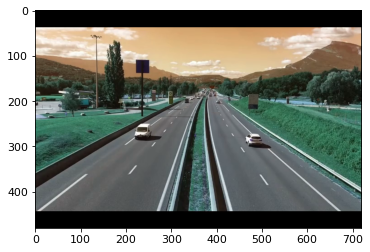

In [14]:
plt.imshow(frames1[10])